In [77]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


import glob
import PIL

from sklearn.model_selection import train_test_split

In [78]:
civs_path = r'C:\Users\alyss\Desktop\ITS365\knnflowers\imgs'

In [79]:
path  = civs_path

paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths    = paths_subset[rand_idxs]

print(n_images)

50


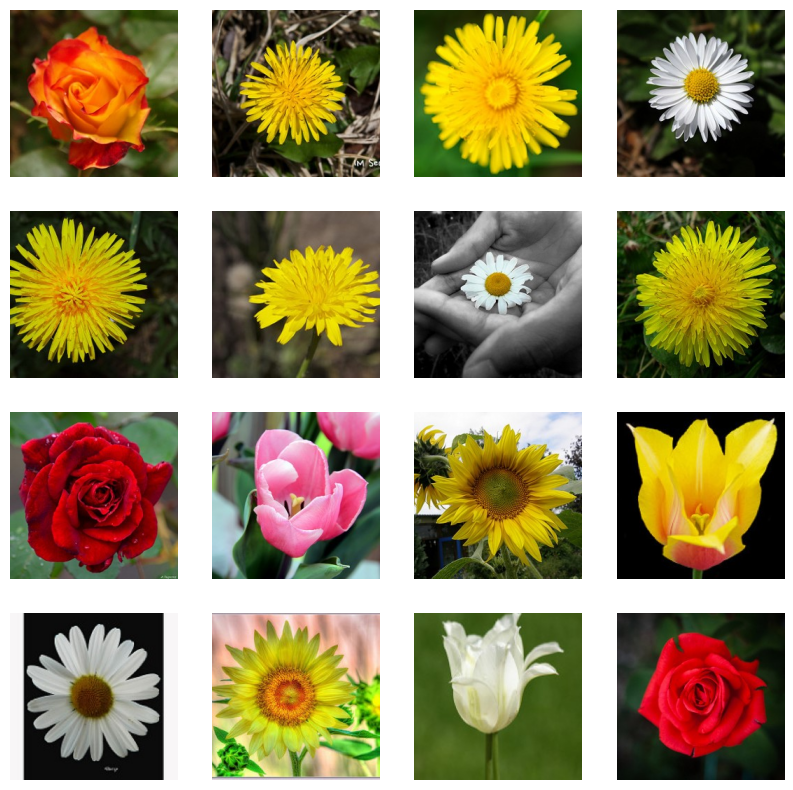

In [80]:
_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")

In [81]:
def label_func2(fname):
    fname = fname.replace(".jpg", "")  # Remove the ".jpg" extension
    file_name_only = fname.split("\\")[-1]  # Extract only the filename from the path
    temp_name = file_name_only.split("_")  # Split the filename based on underscores "_"
    
    # Extracting parameters for your dataset
    c1 = float(temp_name[0].replace("c1-", ""))
    c2 = float(temp_name[1].replace("c2-", ""))
    c3 = float(temp_name[2].replace("c3-", ""))
    c4 = float(temp_name[3].replace("c4-", ""))
    
    print(c1, c2, c3, c4)
    
    # Return a list containing the filename and extracted parameters
    return [fname + ".jpg", c1, c2, c3, c4]

In [82]:
list_imgs = []
list_label_vectors = []

for img_name in all_paths:
    my_img = Image.open(img_name)
    my_img = my_img.resize((128, 128))
    img_np = np.array(my_img)
    
    if img_np.shape[-1] == 1:
        img_np = np.repeat(img_np, 3, axis=-1)
    
    temp_label_vector_rc = label_func2(img_name)
    
    # Adjust the condition check to match your dataset labels (e.g., "c1", "c2", "c3", "c4")
    ## if temp_label_vector_rc[2] == 1:  # This condition may need to be adjusted based on your dataset labels
    if True:
        list_imgs.append(img_np)
        list_label_vectors.append(temp_label_vector_rc)

0.62 0.0 0.54 0.49
0.87 0.0 0.64 0.07
0.91 0.17 0.62 0.04
0.97 1.0 0.82 0.32
0.92 0.09 0.71 0.04
0.73 0.09 0.54 0.04
0.84 1.0 0.58 0.23
0.74 0.15 0.78 0.09
0.72 0.02 0.59 0.46
0.34 0.57 0.1 0.22
0.71 0.96 0.64 0.94
0.32 0.48 0.07 0.23
0.91 1.0 0.56 0.53
0.96 1.0 0.46 0.95
0.23 0.21 0.24 0.27
0.68 0.02 0.34 0.35
0.42 0.34 0.31 0.21
0.65 1.0 0.56 0.37
0.94 0.14 0.77 0.05
0.93 1.0 0.47 0.44
0.19 0.34 0.05 0.16
0.31 0.35 0.22 0.2
0.26 0.0 0.11 0.09
0.99 0.11 0.88 0.08
0.94 1.0 0.55 0.61
0.84 0.27 0.72 0.57
0.23 0.0 0.44 0.54
0.8 1.0 0.51 0.89
0.91 0.1 0.67 0.05
0.83 0.44 0.63 0.32
0.97 1.0 0.64 0.71
0.71 0.05 0.61 0.06
0.99 1.0 0.7 0.74
0.72 0.07 0.74 0.07
0.67 0.05 0.5 0.3
0.91 0.03 0.48 0.42
0.98 1.0 0.7 0.67
0.93 1.0 0.64 0.52
0.83 1.0 0.77 0.91
0.98 1.0 0.84 0.51
0.98 1.0 0.63 0.35
0.94 1.0 0.69 0.93
0.33 0.0 0.11 0.14
0.91 1.0 0.38 0.55
0.41 0.06 0.34 0.54
0.49 0.0 0.16 0.21
0.54 0.23 0.27 0.26
0.49 0.04 0.41 0.58
0.88 1.0 0.68 0.86
0.93 1.0 0.74 0.94


In [83]:
X =  list_imgs
y =  list_label_vectors 

In [84]:
print("Length of X:", len(X))  ##debugging
print("Length of y:", len(y))

Length of X: 50
Length of y: 50


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

45
5
45
5


In [86]:
list_imgs_train = [np.array(img).reshape(128, 128, 3) for img in X_train]
list_imgs_test = [np.array(img).reshape(128, 128, 3) for img in X_test]

In [87]:
X_train[0]

array([[[ 78,  78,  78],
        [ 80,  80,  80],
        [ 81,  81,  81],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[ 80,  80,  80],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       [[ 80,  80,  80],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [ 83,  83,  85],
        [ 84,  84,  86],
        [ 84,  84,  86]],

       ...,

       [[ 86, 150, 116],
        [ 93, 157, 125],
        [ 87, 152, 120],
        ...,
        [ 89,  89,  89],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[ 89, 153, 128],
        [ 90, 154, 129],
        [ 81, 145, 119],
        ...,
        [ 90,  90,  90],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[ 85, 148, 128],
        [ 84, 147, 127],
        [ 76, 140, 116],
        ...,
        [ 90,  90,  90],
        [ 92,  92,  92],
        [ 90,  90,  90]]

In [88]:
list_ids_train = []
list_features_train = []
list_imgs_train = []

for index in range(len(X_train)):
    # Extract label information
    label_info = y_train[index]  # Assuming y_train contains a list of dictionaries
    
    # Separate file path from numerical values
    file_path = label_info[0]
    numerical_values = label_info[1:]
    
    # Create target array
    target = np.zeros((4))  # Adjust the size of the target array if necessary
    print(target.shape)
    # Map numerical label values to target array elements
    for i, value in enumerate(numerical_values):
        target[i] = value  # No need to convert to float again
        
    # Extract and preprocess image data
    single_np_img = X_train[index]  # Adjust this line based on your image data
    
    # Append data to lists
    list_ids_train.append(file_path)  # Assuming the first element in label_info is the file path
    list_imgs_train.append(single_np_img)
    list_features_train.append(target)


(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)


In [89]:
    
list_features_train[1]


array([0.23, 0.  , 0.44, 0.54])

In [90]:
list_imgs_train[0]

array([[[ 78,  78,  78],
        [ 80,  80,  80],
        [ 81,  81,  81],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[ 80,  80,  80],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       [[ 80,  80,  80],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [ 83,  83,  85],
        [ 84,  84,  86],
        [ 84,  84,  86]],

       ...,

       [[ 86, 150, 116],
        [ 93, 157, 125],
        [ 87, 152, 120],
        ...,
        [ 89,  89,  89],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[ 89, 153, 128],
        [ 90, 154, 129],
        [ 81, 145, 119],
        ...,
        [ 90,  90,  90],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[ 85, 148, 128],
        [ 84, 147, 127],
        [ 76, 140, 116],
        ...,
        [ 90,  90,  90],
        [ 92,  92,  92],
        [ 90,  90,  90]]

In [91]:


list_ids_test = []
list_features_test = []
list_imgs_test = []

for index in range(len(X_test)):
    # Extract label information
    label_info = y_test[index]  # Adjust this line based on your label structure
    
    # Separate file path from numerical values
    file_path = label_info[0]
    numerical_values = label_info[1:]
    
    # Create target array
    target = np.zeros((4))  # Adjust the size of the target array if necessary
    
    # Map numerical label values to target array elements
    target[0] = numerical_values[0]  # Assuming the first numerical value corresponds to target[0]
    target[1] = numerical_values[1]
    target[2] = numerical_values[2]
    target[3] = numerical_values[3]
    # Assign other numerical values to target elements as needed
    
    # Extract and preprocess image data
    single_np_img = X_test[index]  # Adjust this line based on your image data
    
    # Append data to lists
    list_ids_test.append(file_path)  # Assuming the first element in label_info is the file path
    list_imgs_test.append(single_np_img)
    list_features_test.append(target)


In [92]:
conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )

In [93]:
print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )

(45, 4)
(5, 4)


In [94]:
DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("PD_conditions_train.csv")

In [95]:
DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("PD_ids_train.csv")

In [96]:
list_imgs_train[14]

array([[[33, 31, 32],
        [31, 29, 30],
        [30, 28, 29],
        ...,
        [ 5,  4,  2],
        [ 5,  4,  2],
        [ 5,  4,  2]],

       [[35, 33, 34],
        [35, 33, 34],
        [34, 32, 33],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 4,  3,  1]],

       [[37, 35, 36],
        [37, 35, 36],
        [37, 35, 36],
        ...,
        [ 3,  3,  1],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       ...,

       [[ 8, 13, 11],
        [ 9, 14, 10],
        [ 9, 14, 10],
        ...,
        [13,  9,  6],
        [14, 10,  7],
        [15, 11,  8]],

       [[ 8, 12, 11],
        [ 8, 13,  9],
        [ 8, 13,  9],
        ...,
        [13,  9,  6],
        [15, 11,  8],
        [16, 12,  9]],

       [[ 8, 12, 11],
        [ 7, 12,  8],
        [ 7, 12,  8],
        ...,
        [13,  9,  6],
        [15, 11,  8],
        [17, 13, 10]]], dtype=uint8)

In [97]:
list_imgs_train[14].shape

(128, 128, 3)

In [98]:
list_imgs_train_stretched = [     the_img_np.reshape(-1)         for the_img_np in list_imgs_train ]

In [99]:
list_imgs_train_stretched[0]

array([78, 78, 78, ..., 90, 90, 90], dtype=uint8)

In [100]:
list_imgs_train_stretched[4].shape

(49152,)

In [101]:
list_imgs_train_stretched[4][:1000]

array([ 87, 155,  39,  81, 151,  33,  74, 144,  28,  71, 140,  26,  69,
       139,  26,  56, 130,  13,  44, 125,   1,  45, 136,   0,  68, 156,
         8,  84, 163,  11,  83, 162,  11,  81, 163,   6,  77, 162,   2,
        68, 151,   3,  63, 140,   9,  57, 132,   2,  57, 133,   0,  66,
       145,  12,  87, 165,  37,  99, 176,  48, 100, 178,  51, 100, 180,
        54, 105, 181,  59, 107, 175,  59,  95, 156,  43,  76, 133,  28,
        66, 125,  21,  79, 143,  24,  89, 153,  30,  99, 161,  47, 135,
       192, 101, 176, 226, 155, 195, 240, 179, 197, 238, 178, 187, 231,
       170, 166, 222, 146, 130, 199,  99, 118, 193,  72, 114, 185,  59,
        89, 154,  32,  58, 118,   5,  44, 103,   0,  59, 124,  12,  75,
       146,  17,  71, 148,   4,  91, 172,  28, 115, 197,  66, 123, 204,
        79, 125, 205,  78, 127, 205,  75, 125, 200,  73, 112, 191,  56,
        84, 157,  34,  54, 118,  13,  43, 104,   0,  58, 122,   8,  84,
       150,  29, 113, 176,  56, 143, 197,  80, 151, 208,  86, 13

In [102]:
list_imgs_train_stretched[7].shape

(49152,)

In [103]:
np_list_imgs_train_stretched = np.array( list_imgs_train_stretched ) 

In [104]:
np_list_imgs_train_stretched.shape

(45, 49152)

In [105]:
np_list_imgs_train_stretched[3]

array([ 94, 121,  80, ...,  18,  53,   3], dtype=uint8)

In [106]:
DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)

In [107]:
DF_imgs_np_train

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,78,78,78,80,80,80,81,81,81,80,...,89,90,90,90,92,92,92,90,90,90
1,20,35,9,18,32,6,20,33,7,19,...,47,94,107,63,103,116,73,101,114,71
2,73,76,61,72,76,60,71,75,60,72,...,42,51,54,42,51,54,42,50,54,42
3,94,121,80,66,91,59,148,168,156,158,...,113,49,64,72,29,64,22,18,53,3
4,87,155,39,81,151,33,74,144,28,71,...,3,18,59,0,16,68,2,16,74,2
5,248,246,247,248,246,247,248,246,247,248,...,247,248,246,247,248,246,247,248,246,247
6,24,32,19,25,33,19,28,37,21,30,...,27,47,56,30,49,62,31,45,60,25
7,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
8,66,107,63,66,107,63,66,107,65,65,...,74,85,121,88,74,117,80,57,103,64
9,48,59,27,43,54,24,35,48,20,30,...,0,1,1,1,5,5,5,5,5,5


In [108]:
DF_imgs_np_train.to_csv("PD_imgs_np_train.csv")


## from here you are done and can continue on html


In [109]:
url1 = "PD_ids_train.csv"
pd_ids_train = pd.read_csv(url1)
pd_ids_train_np = pd_ids_train.to_numpy()
pd_ids_train_np = pd_ids_train_np[1:, 1:]

In [110]:
url2 = "PD_conditions_train.csv"
pd_conditions_train = pd.read_csv(url2)
pd_conditions_train_np = pd_conditions_train.to_numpy()
pd_conditions_train_np   = pd_conditions_train_np[1:, 1:]

In [111]:
url3 = "PD_imgs_np_train.csv"
pd_imgs_np_train = pd.read_csv(url3)
pd_imgs_np_train_np = pd_imgs_np_train.to_numpy()
pd_imgs_np_train_np      = pd_imgs_np_train_np[1:, 1:]

In [112]:
def euclidean_distance(v1, v2):
    return np.sqrt( np.sum(   (v1 - v2)**2   )   )

In [113]:
def predict(test_x):
    
    ## calculate distances between test_x and all dta samples in x
    ## this distances vector is a vector of 45 distances
    ## distances = [ euclidean_distance(test_x , x)  for x in X_train    ]

    distances = [ euclidean_distance(test_x, x )  for x in pd_conditions_train_np  ]
      
    
    ## distances - > [23, 3, 145, 17, ...]
    
    k = 3
    
    ## sort by distance value and return the k nearest neighbors
    ## np.argsort returns the indices of the k neares neighbors
    k_neighbor_indices = np.argsort(distances)[:k]
    print(k_neighbor_indices)
    
    
    ## with indices, extract labels from y_train 
    selected_imgs_to_avg = [ pd_imgs_np_train_np[i].reshape((128, 128, 3))  for i in k_neighbor_indices  ]
    

    return selected_imgs_to_avg

In [114]:
np.set_printoptions(suppress=True)
print( conditions_matrix_train[:, :] )

[[0.88 1.   0.68 0.86]
 [0.23 0.   0.44 0.54]
 [0.84 0.27 0.72 0.57]
 [0.99 1.   0.7  0.74]
 [0.93 1.   0.47 0.44]
 [0.91 1.   0.56 0.53]
 [0.92 0.09 0.71 0.04]
 [0.93 1.   0.64 0.52]
 [0.72 0.02 0.59 0.46]
 [0.97 1.   0.82 0.32]
 [0.84 1.   0.58 0.23]
 [0.94 1.   0.69 0.93]
 [0.54 0.23 0.27 0.26]
 [0.49 0.04 0.41 0.58]
 [0.68 0.02 0.34 0.35]
 [0.34 0.57 0.1  0.22]
 [0.42 0.34 0.31 0.21]
 [0.94 1.   0.55 0.61]
 [0.67 0.05 0.5  0.3 ]
 [0.71 0.05 0.61 0.06]
 [0.62 0.   0.54 0.49]
 [0.41 0.06 0.34 0.54]
 [0.8  1.   0.51 0.89]
 [0.72 0.07 0.74 0.07]
 [0.73 0.09 0.54 0.04]
 [0.83 0.44 0.63 0.32]
 [0.32 0.48 0.07 0.23]
 [0.98 1.   0.7  0.67]
 [0.87 0.   0.64 0.07]
 [0.31 0.35 0.22 0.2 ]
 [0.91 0.17 0.62 0.04]
 [0.91 1.   0.38 0.55]
 [0.91 0.03 0.48 0.42]
 [0.99 0.11 0.88 0.08]
 [0.98 1.   0.63 0.35]
 [0.71 0.96 0.64 0.94]
 [0.26 0.   0.11 0.09]
 [0.94 0.14 0.77 0.05]
 [0.93 1.   0.74 0.94]
 [0.19 0.34 0.05 0.16]
 [0.74 0.15 0.78 0.09]
 [0.33 0.   0.11 0.14]
 [0.23 0.21 0.24 0.27]
 [0.91 0.1 

In [115]:
def generate_img_per_index(index):
    
    selected_imgs_to_avg = predict( conditions_matrix_test[  index  ] )
    the_test_conditions = conditions_matrix_test[  index  ]
    
    
    avg_gen_img = np.mean( np.array(selected_imgs_to_avg), axis=0 )
    avg_gen_img = avg_gen_img.astype(int)
    gen_pil_image = avg_gen_img
    
    real_my_img = np.array(list_imgs_test[index])
    real_pil_image = Image.fromarray(real_my_img)
    
    print(gen_pil_image)
    print(real_pil_image)
    
    return the_test_conditions, gen_pil_image, real_pil_image

[9 3 4]
[[[121 143 105]
  [117 140 101]
  [116 138 100]
  ...
  [174 198 157]
  [174 199 158]
  [173 198 156]]

 [[119 141 104]
  [120 143 105]
  [120 143 105]
  ...
  [170 195 155]
  [173 197 156]
  [175 199 158]]

 [[122 143 108]
  [125 147 111]
  [125 148 112]
  ...
  [169 194 156]
  [173 197 157]
  [176 199 158]]

 ...

 [[106 120  87]
  [101 114  83]
  [101 111  82]
  ...
  [101 113  94]
  [100 116  93]
  [ 99 117  92]]

 [[116 126  91]
  [112 120  86]
  [111 115  85]
  ...
  [105 118  99]
  [102 119  96]
  [100 118  94]]

 [[122 128  91]
  [118 123  87]
  [120 122  89]
  ...
  [107 120 101]
  [105 122 100]
  [103 122  98]]]
<PIL.Image.Image image mode=RGB size=128x128 at 0x2A8CC4C0448>


Text(0.5, 1.0, 'real')

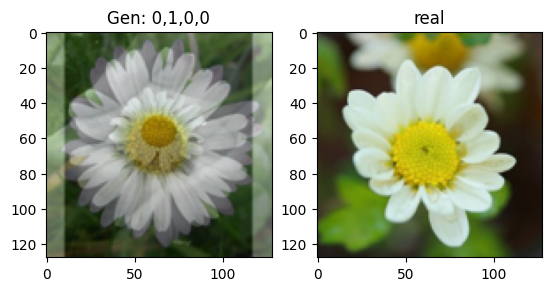

In [116]:
the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(4)


the_test_conditions = the_test_conditions.astype(int)
str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
str_conditions = str_conditions.replace(" ","")
str_conditions = str_conditions.replace("[","")
str_conditions = str_conditions.replace("]","")

## print(str_conditions)
                 

fig, ax = plt.subplots(1,2)

ax[0].imshow(gen_pil_image)
ax[1].imshow(real_pil_image)

ax[0].set_title("Gen: " + str_conditions)
ax[1].set_title("real")

[21 10 37]
[[[147 161 164]
  [143 162 157]
  [142 165 154]
  ...
  [159 180 178]
  [158 177 174]
  [153 170 169]]

 [[156 175 168]
  [141 162 152]
  [151 177 159]
  ...
  [163 181 174]
  [166 180 173]
  [162 174 168]]

 [[172 195 174]
  [174 198 175]
  [164 190 167]
  ...
  [181 193 180]
  [179 187 174]
  [172 178 164]]

 ...

 [[130 145 108]
  [135 153 115]
  [125 145 108]
  ...
  [116 132  90]
  [100 113  76]
  [102 114  81]]

 [[137 155 105]
  [152 173 122]
  [138 161 111]
  ...
  [112 126  95]
  [107 118  88]
  [114 123  94]]

 [[148 171 107]
  [153 181 114]
  [155 183 120]
  ...
  [105 117  91]
  [108 117  89]
  [113 120  90]]]
<PIL.Image.Image image mode=RGB size=128x128 at 0x2A8CC40B748>
[ 8  6 26]
[[[129 133 111]
  [128 132 110]
  [125 130 109]
  ...
  [128 132 115]
  [130 134 116]
  [132 136 117]]

 [[128 133 110]
  [127 132 110]
  [125 130 109]
  ...
  [131 135 118]
  [134 139 120]
  [136 141 122]]

 [[126 131 110]
  [126 131 110]
  [125 130 109]
  ...
  [134 138 121]
  [137 

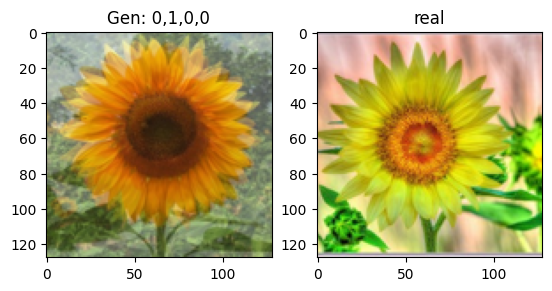

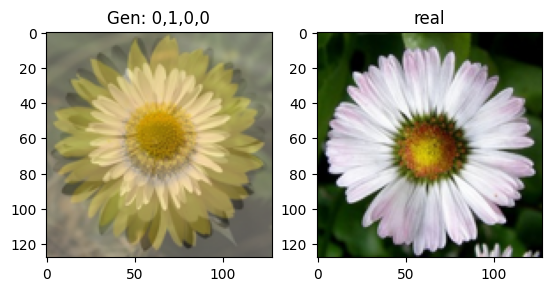

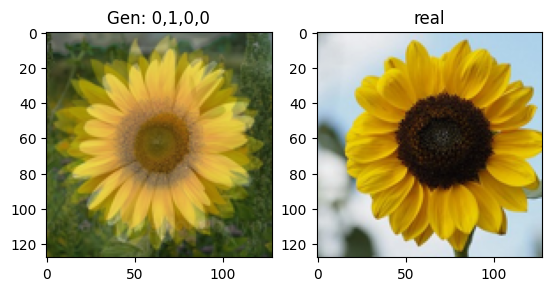

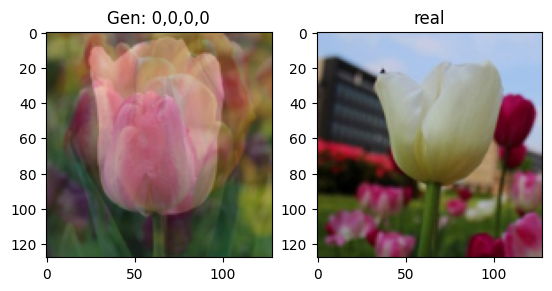

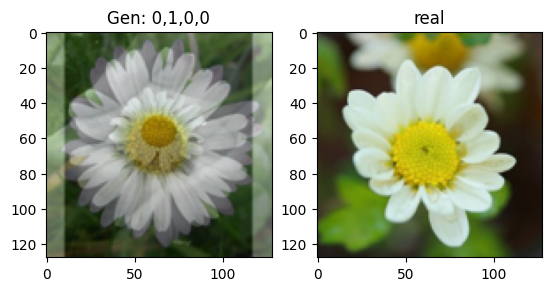

In [117]:
for test_i in range( conditions_matrix_test.shape[0]  ):


    the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(test_i)
    
    the_test_conditions = the_test_conditions.astype(int)
    str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
    str_conditions = str_conditions.replace(" ","")
    str_conditions = str_conditions.replace("[","")
    str_conditions = str_conditions.replace("]","")

    ## print(str_conditions)

    fig, ax = plt.subplots(1,2)
    ax[0].imshow(gen_pil_image)
    ax[1].imshow(real_pil_image)
    
    ax[0].set_title("Gen: " + str_conditions)
    ax[1].set_title("real")